In [1]:
from os import write
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# from scipy import optimize as op
# from scipy import integrate as inte
# import math
import eos_no_tem
import parameter


In [2]:
# 星球参数设置区域
P_s = parameter.P_s # 行星表面的压力
# P_center = [48.8,51.0] # 行星中心位置处的压强范围 kbar
Rho_s = parameter.Rho_s # 行星表面的密度 kg/m^3
# T_s = 102.0 # 行星表面的温度 K
# d_T = 3.0 # 对流区域的地温梯度 K/km
R_p = parameter.R_p# 行星半径 m
M_p = parameter.M_p # 行星质量，（0.008个地球质量）kg
# g_s = 1.314 # 行星表面的重力, m/s^2

# 输入模型参数
# M_h2o = 0.10 # 壳的质量分数
M_fe = parameter.M_fe # 核的质量分数
error_M_fe = parameter.error_M_fe # 核的质量分数的误差范围

step = parameter.step # 计算步长 km

# 参数计算
# M_mgfe2sio4 = 1-M_h2o-M_fe # 硅酸盐幔的质量分数



In [3]:
# 开始计算

# initial
r_range = np.arange(R_p,-step,-step)
var_0 = [M_p,P_s,Rho_s]
ans = []
ansls = []

m1 = M_fe-error_M_fe
m2 =  M_fe+error_M_fe

# compute
for m_i in range(1000):

    com_m_fe = (m1+m2)/2

    print(m_i+1)
    print('-'*20)
    print(com_m_fe)

    material = []
    radius = []
    mass = [M_p]
    pressure = [P_s]
    density = [Rho_s]
    var = var_0

    for i in r_range:
        vars = eos_no_tem.RKplanetmodel(var,step,i,com_m_fe)
        if vars == 'stop':
            break
        var = vars[0:3]
        material.append(vars[-1])
        mass.append(vars[0])
        pressure.append(vars[1])
        density.append(vars[2])
        radius.append(i)

        # if i%1000 == 0:
        #     print(i)

    print(mass[-1]/mass[0],'\t',radius[-1],'\n\n\n')    
    if abs(mass[-1]/mass[0]) <= 1e-4 and radius[-1] == 0:
        break
    elif radius[-1] > 0:
        m2 = com_m_fe
    else:
        m1 = com_m_fe
    # if mass[-1]/mass[0] == mass[-2]/mass[0] and radius[-1] == radius[-2]:
    #     break
            
    

# if abs(var[-1]/M_p) <= 0.001:
#     ansls.append(ans)

1
--------------------
0.07999999999999999
0.06389128019961414 	 0.0 





stop at 0.0m of radius
289500.0
1398500.0


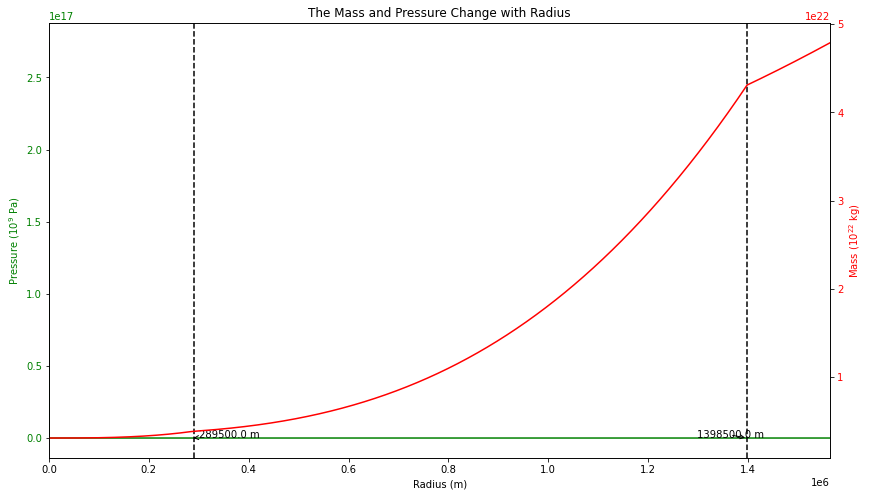

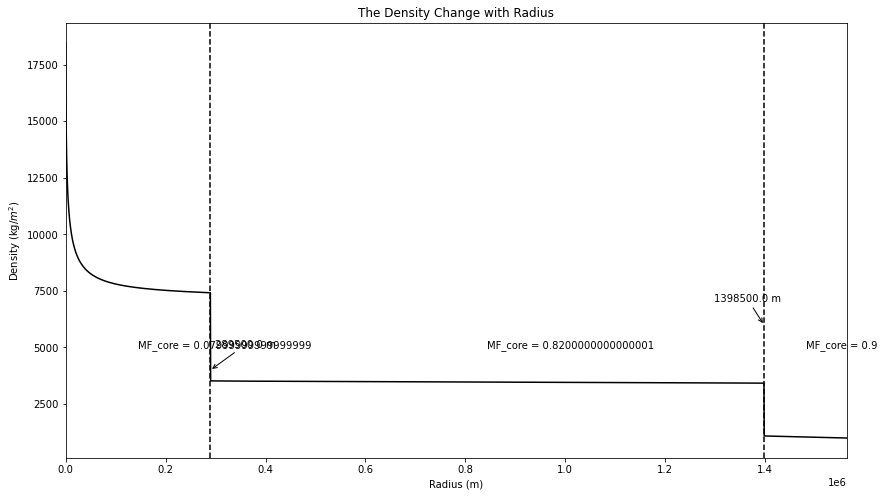

In [4]:
# 作图
r_stop = R_p-len(mass)*step
print('stop at {}m of radius'.format(r_stop+2*step))
r_cmb = R_p-(material.index('core')+1)*step
print(r_cmb)
r_mcrub = R_p-(material.index('mantle')+1)*step
print(r_mcrub)
# r_upm = R_p-(material.index('up_mantle')+1)*step
# print(r_upm)
# r_lm = R_p-(material.index('low_mantle')+1)*step
# print(r_lm)

r_compute = np.arange(R_p,r_stop,-step)

fig, ax = plt.subplots(figsize=(14,8))

plt.plot(r_compute,pressure,'g')
plt.title('The Mass and Pressure Change with Radius')
plt.xlabel('Radius (m)')
plt.ylabel('Pressure ($10^9$ Pa)',color = 'g')
plt.xlim(0,R_p)
ax.axvline(r_cmb, ls='--', c='k')
plt.annotate('{} m'.format(r_cmb),(r_cmb,3e9),xycoords='data',xytext=(r_cmb+0.01e6,4e9),arrowprops=dict(arrowstyle='->'))
# ax.axvline(r_upm, ls='--', c='k')
# plt.annotate('{} m'.format(r_upm),(r_upm,3e9),xycoords='data',xytext=(r_upm+0.01e6,4e9),arrowprops=dict(arrowstyle='->'))
# ax.axvline(r_lm, ls='--', c='k')
# plt.annotate('{} m'.format(r_lm),(r_lm,3e9),xycoords='data',xytext=(r_lm-0.01e6,4e9),arrowprops=dict(arrowstyle='->'))
ax.axvline(r_mcrub, ls='--', c='k')
plt.annotate('{} m'.format(r_mcrub),(r_mcrub,5e9),xycoords='data',xytext=(r_mcrub-0.1e6,4e9),arrowprops=dict(arrowstyle='->'))
ax.tick_params(axis='y', labelcolor='g')

ax2 = ax.twinx()
ax2.plot(r_compute,mass,'r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylabel('Mass ($10^{22}$ kg)', color = 'r')
plt.show()

fig, ax = plt.subplots(figsize=(14,8))
plt.plot(r_compute,density,'black')
plt.title('The Density Change with Radius')
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg/$m^2$)')
ax.axvline(r_cmb, ls='--', c='k')
plt.annotate('{} m'.format(r_cmb),(r_cmb,4000),xycoords='data',xytext=(r_cmb+0.01e6,5000),arrowprops=dict(arrowstyle='->'))
ax.axvline(r_mcrub, ls='--', c='k')
plt.annotate('{} m'.format(r_mcrub),(r_mcrub,6000),xycoords='data',xytext=(r_mcrub-0.1e6,7000),arrowprops=dict(arrowstyle='->'))
# ax.axvline(r_upm, ls='--', c='k')
# plt.annotate('{} m'.format(r_upm),(r_upm,6000),xycoords='data',xytext=(r_upm+0.01e6,7000),arrowprops=dict(arrowstyle='->'))
# ax.axvline(r_lm, ls='--', c='k')
# plt.annotate('{} m'.format(r_lm),(r_lm,6000),xycoords='data',xytext=(r_lm+0.01e6,7000),arrowprops=dict(arrowstyle='->'))
plt.text(r_cmb/2,5000,'MF_core = {}'.format(com_m_fe))
plt.text((r_cmb+r_mcrub)/2,5000,'MF_core = {}'.format(1-(com_m_fe+eos_no_tem.M_h2o)))
plt.text((r_mcrub+R_p)/2,5000,'MF_core = {}'.format(1-(eos_no_tem.M_h2o)))
plt.xlim(0,R_p)
plt.show()

# print('-'*60 )
# print(com_m_fe)

In [5]:

# def save(file,ls):
#     for i in ls:
#         file.writelines(str(i)+'\n')

# m = open('mass.txt','w')
# save(m,mass)
# m.close()
# p = open('pressure.txt','w')
# save(p,pressure)
# p.close()
# rh = open('density.txt','w')
# save(rh,density)
# rh.close()
# ma = open('material.txt','w')
# save(ma,material)
# ma.close()